# Proyecto final propedeutico MCD
## Análisis de ecuaciones de Lotka-Volterra

Objetivos:
* Utilizar el paquete scipy.integrate para resolver sistemas de ecuaciones diferenciales
* Presentar el paquete de Python Sympy
* Utilizar matplotlib.pyplot para generar gráficas 

### Ecuaciones de Lotka - Volterra
La ecuaciones de Lotka - Volterra es un sistema de ecuaciones que se utiliza para describir la dinámica de sistemas bilógicos en el que interactuan dos o mas especies. Estas especies tienen una relación de depredador presa y las ecuaciones nos ayudan a modelar la población total de cada especie a lo largo del tiempo.

Las ecuaciones fueron propuestas de forma independiente por Alfred Lotka en 1925 y por Vito Volterra en 1926.


$$ \frac{dx(t)}{dt} =  \alpha \cdot x(t) - \beta  \cdot x(t) \cdot y(t)$$

$$ \frac{dy(t)}{dt} = -\gamma \cdot y(t) + \delta \cdot x(t) \cdot y(t)$$

* $x(t)$ y $y(t)$ son funciones que representan la cantidad total de presas y depredadores respectivamente.
* Las constantes $\alpha$ y $\gamma$ representan los cambios en la población de cada especie de forma independiente (sin interacción).
* Las constantes $\beta$ y $\delta$ representan las afectaciones de la interacción en cada población.


### Clasificación y solución del sistema
Este es un sistema de dos ecuaciones diferenciales ordinarias de primer orden no lineal. El término no lineal hace que sea muy difícil encontrar una solución analítica para este tipo de sistemas. De hecho, en la literatura encontramos que no hay solución conocida para el caso general de este sistema de dos ecuaciones.


#### Caso en que una población es constante o cero
Supongamos que la población de depradadores es constante en el tiempo, entonces $\frac{dy(t)}{dt}=0$ y quedamos solamente con una ecuación de la siguiente forma:

$$ \frac{dx(t)}{dt} = x(t) \cdot (\alpha-\beta \cdot y(t))=cte \cdot x(t)$$

La solución general a esta ecuación la podemos encontrar con el paquete Sympy para python. Este paquete nos ayuda a hacer algunas operaciones matmáticas de forma analítica. Se pueden resolver problemas de álgebra, geometría, calculo integral y difernecia, ecuaciones diferenciales y muchos otros.

[En este link podemos ver la documentación de Sympy](https://docs.sympy.org/latest/index.html)

In [ ]:
from sympy import *

In [ ]:
#Solución de ecuación diferencial con Sympy

#La función symbols define los símbolos que se usarán en la expresión
t,c=symbols("t c") #define los simbolos que representan cantidades
x = symbols("x", cls=Function) #define los símbolos que representan funciones

#La función Eq define una igualdad
#La función Derivative define la función a derivar y el variable independiente
eq=Eq(Derivative(x(t),t),c*x(t)) 

#Resuelve sistemas de ecuaciones diferenciales ordinarias
dsolve(eq)

La solución es un crecimiento exponencial.

#### La solución de Sympy para las ecuaciones originales

In [ ]:
#Solució de EDO-no lineal con Sympy
t=symbols("t") #Definimos símbolos
x,y = symbols("x y", cls=Function)#Definimos funciones

#Se debe de mandar un arreglo ordenado a dsolve en el que están las ecuaciones a resolver
#Definimos las dos igualdades dentro del arreglo
eq= (Eq(Derivative(x(t),t), x(t) -y(t)),Eq(Derivative(y(t),t),-y(t)+y(t)*x(t)))

#Llamamos la función para resolver el sistema
dsolve(eq)

Al intentar resolver el sistema sin solución analítica obtenemos el error "Equality" object is not iterable

No pudo clasificar el sistema como alguno de los 5 tipos de clasificación que tiene Sympy para resolver un sistema de 2 EDO no lineales.

[Seguir este link para más información](https://docs.sympy.org/latest/modules/solvers/ode.html#system-of-odes-nonlinear-2eq-order1-type1)

#### Solución numérica al sistema de EDO


In [19]:
#importamos los paquetes que se necesitan
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%

In [148]:
#Definimos en una función el sistema de ecuaciones que se quiere integrar

def f(t,xy):
    #Definimos el valor numérico de las constantes
    alpha=1. # Constante de crecimiento intrinseca para las presas (+)
    beta=.1  # Constante que indica la rapidez con que la cantidad de presas disminuye al interactuar con el depredador (-)
    gamma=1.5 # Constante de (de)crecimiento intrinseca del depredador (-)
    delta=.075 # Cosntante de crecimiento de depredadores en presencia de las presas (+)

    #Definimos las dos ecuaciones a intergrar
    dx = xy[0] * ( alpha - beta  * xy[1])
    dy = xy[1] * (-gamma + delta * xy[0])
    
    #Regresa el resultado en un arreglo ordenado
    return np.array([dx,dy])

In [194]:
#Definimos las condiciones iniciales para las dos poblaciones y el tiempo
depredadores=12
presas=7
condicion_inicial=np.array([presas,depredadores])

#Definimos el inervalo de tiempo a analizar el comportamiento
t0=0
tf=15
t=np.array([t0,tf])

#Definimos los puntos en el tiempo
n=10000
t_ev=np.linspace(t0,tf,n)

#Llamamos el método
sol=solve_ivp(f, t, condicion_inicial,vectorized="true",t_eval=t_ev)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 194
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.50015002e-03, 3.00030003e-03, ...,
       1.49969997e+01, 1.49984998e+01, 1.50000000e+01])
 t_events: None
        y: array([[ 7.        ,  6.99790931,  6.99583765, ..., 41.40794625,
        41.37723323, 41.34631968],
       [12.        , 11.98245966, 11.96494217, ..., 14.9281603 ,
        14.96413429, 15.00014297]])

El método solve_ivp del paquete scipy.integrate resuelve sistemas de ecuaciones diferenciales ordinarias con problemas de condiciones iniciales. Recibe los argumentos:
* $f(t,xy)$ función con el sistema de ecuaciones diferenciales vercrizado. Recibe como parametros un punto en el tiempo y un las condiciones del sitema en ese punto.
* $t$ es el intervalo del tiempo.
* $condicion_inicial$ Las condidiones iniciales del problema.
* $vectorized$ Indicación de que pasamos las ecuaciones y condiciones en forma vectorizada.
* $t_{eval}$ Puntos en el tiempo donde se evaluará el método numérico.

El método devuelve un objeto con información del método, las $t$ evaluadas y la solución $y$ en el tiempo $t$

[Para más información sobre solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)

[Para más información sobre Scipy](https://docs.scipy.org/doc/scipy/reference/index.html)

In [150]:
#Definimos función que grafica la solución usando matplotlib
def grafica(sol):
    plt.plot(sol.t,sol.y[0],sol.t,sol.y[1]) #graficamos la solucion x y y
    plt.title("Evolucion de la poblacion en el tiempo")
    plt.xlabel("Tiempo")
    plt.ylabel("Cantidad de animales")
    plt.legend(("Presas x(t)","Depredadores y(t)"),loc=1)
    plt.grid(True)

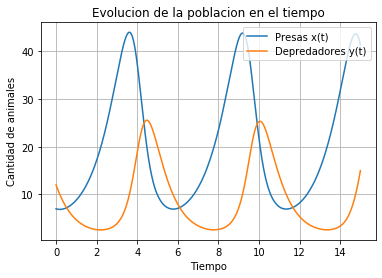

In [151]:
grafica(sol)

Otra manera de ver esta interaccion en por medio del espacio fase.

<function matplotlib.pyplot.show(*args, **kw)>

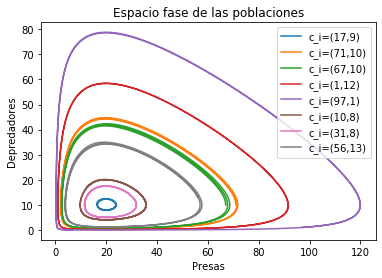

In [167]:
#Generación y gráfica del espacio fase
for i in range(4,12): #evaluamos el sistema con diferentes condiciones iniciales
    c_i=np.array([i*np.random.randint(15)+1, np.random.randint(15)+1]) #generamos pares aleatorios de condiciones iniciañes
    sol=solve_ivp(f, t, c_i, vectorized="true", t_eval=t_ev) #resolvemos las ecuaciones con esas condiciones
    plt.plot(sol.y[0], sol.y[1], label="c_i=(%i,%i)"%(c_i[0],c_i[1])) #imprimimos las solucion en la grafica

#Poemos títulos y estilo a la gráfica    
plt.title("Espacio fase de las poblaciones")
plt.xlabel("Presas")
plt.ylabel("Depredadores")
plt.legend()
plt.show #muestra la gráfica

Podemos notar que es una solucion periódica por que cada integración es una curva cerrada en el espacio fase.
También se puede ver que todas tienen un centro común, por lo que existe una posición de equilibrio.

Para encontrar el punto crítico podemos hacer $\frac{dx}{dt}=\frac{dy}{dt}=0$
Al reducir la ecuaciones encontramos que el punto crítico esta cuando se cumplen las siguientes condiciones:
1. $y=\frac{\alpha}{\beta}$ 
2. $x=\frac{\gamma}{\delta}$

En la siguiente gráfica notamos que no hay movimiento en las poblaciónes para ese punto.

Las condiciones iniciales son: [20. 10.]


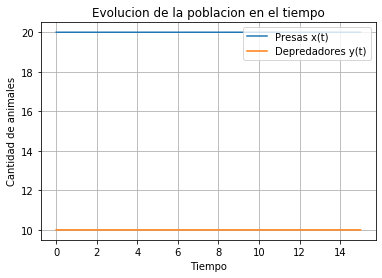

In [174]:
#Estas son las constantes que definimos en la función
alpha=1. # Constante de crecimiento intrinseca para las presas (+)
beta=.1  # Constante que indica la rapidez con que la cantidad de presas disminuye al interactuar con el depredador (-)
gamma=1.5 # Constante de (de)crecimiento intrinseca del depredador (-)
delta=.075 # Cosntante de crecimiento de depredadores en presencia de las presas (+)

c_i=np.array([gamma/delta,alpha/beta]) #generamos pares aleatorios de condiciones iniciañes
print("Las condiciones iniciales son:",c_i)
sol=solve_ivp(f, t, c_i, vectorized="true", t_eval=t_ev) #resolvemos las ecuaciones con esas condiciones

grafica(sol)

### Interacción de tres especies
En este modelo interactuan 3 especies.
$$\frac{dP_1}{dt} = g_1  P_1(t) + d_{1,2}  P_1(t) P_2(t) + d_{1,3} P_{1}(t) P_3(t)$$

$$\frac{dP_2}{dt} = d_{2,1}  P_2(t) P_1(t) + g_2  P_2(t) + d_{2,3} P_{2}(t) P_3(t)$$

$$\frac{dP_3}{dt} = d_{3,1}  P_3(t) P_1(t) + d_{3,2} P_{3}(t) P_2(t) + g_3  P_3(t)$$

Con el vector $g$ que determina el crecimiento intrinseco de cada especie y la matriz d contiene las constantes de interaccion entre cada especie.

Tenemos otro sistema de EDO no lineales de 3 ecuaciones sin solución exacta.

In [191]:
#Definimos la función a integrar
def f3(t,xyz):
    a=np.array([.25,-.5,-.5]) # definimos la matriz a
    d=np.array([[0,-.04,-.04],[.04,0,-.02],[.02,.04,0]]) #definimos las interacciones entre especes
    
    #Definimos la ecuaciones a intergrar
    dx = a[0]*xyz[0] + d[0][1]*xyz[0]*xyz[1] + d[0][2]*xyz[0]*xyz[2]
    dy = a[1]*xyz[1] + d[1][0]*xyz[1]*xyz[0] + d[1][2]*xyz[1]*xyz[2]
    dz = a[2]*xyz[2] + d[2][0]*xyz[2]*xyz[0] + d[2][1]*xyz[2]*xyz[1]
    
    return np.array([dx,dy,dz])

In [189]:
#Las condiciones iniciales
sp1=40
sp2=10
sp3=5
condicion_inicial=np.array([sp1,sp2,sp3])

#El intervalo de tiempo
t0=0
tf=150
n=10000
t=np.array([t0,tf])

#Llamamos el método solve_ivp
sol=solve_ivp(f3, t, condicion_inicial,vectorized="true",t_eval=np.linspace(t0,tf,n))

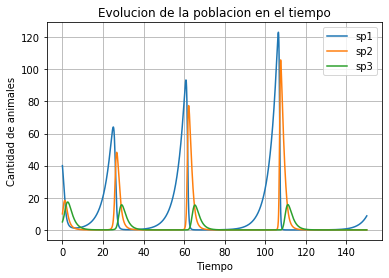

In [192]:
#Imprimimos los resultados
plt.plot(sol.t,sol.y[0],sol.t,sol.y[1],sol.t,sol.y[2])
plt.title("Evolucion de la poblacion en el tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Cantidad de animales")
plt.legend(("sp1","sp2","sp3"))
plt.grid(True)

Fuentes:
* [Nuriyev, Barat and Ergenc, Tanil. Exact Solution of Two-Dimensional Lotka-Volterra Equations.](https://pdfs.semanticscholar.org/c0df/017532dad2525651a759adb70d6b4502145c.pdf)
* [Cano Cancela, Alfredo. Sistemas de Lotka-Volterra en dinámica poblacional.](http://e-spacio.uned.es/fez/eserv/bibliuned:masterMatavanz-Acano/Documento.pdf)
* [Devireddy, Lalith. Extending the Lotka-Volterra equations.](https://sites.math.washington.edu/~morrow/336_16/2016papers/lalith.pdf)

Por:
Juan Pablo Herrera

CU: 108353

Propedeutico Maestría en Ciencia de Datos 

Prof. Erick Palacios Moreno

ITAM
